# Credit Card Fraud Detection



The working done in this python file is for my Master's Capstone Project. The dataset has been obtained from the open-source public website named Kaggle. This project is inspired from the fraud that I faced when I was trying to make a purchase at the local grocery store.

### Importing libraries

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px


from IPython.core.display import display, HTML

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

### Load the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [3]:
data.head(20)

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   

         V25       V26       V27       V28  Amount  Class  
0   0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1   0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3   0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  -0.206010  0.502292  0.219422  0.215153   69.99      0  
5  -0.232794  0.105915  0.253844  0.081080    3.67      0  
6   0.750137 -0.257237  0.034507  0.005168    4.99      0  
7  -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8   0.373205 -0.384157  0.011747  0.142404   93.20      0  
9  -0.069733  0.094199  0.246219  0.083076    3.68      0  
10  0.251367 -0.129478  0.042850  0.016253    7.80      0  
11 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
12  0.161

In [4]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

From the above command, we get the mean value of Amount which is $88. This means that the transactions are relatively done in smaller denomination. Usally the samller the transaction value, the less is the fraud and that's the reason the dataset is imbalanced that has more NON FRAUD values than FRAUD.

In [5]:
print("Non Frauds", round(data["Class"].value_counts()[0]/len(data)*100, 2),"% of the dataset")

print("Fraud", round(data["Class"].value_counts()[1]/len(data)*100, 2),"% of the dataset")


Non Frauds 99.83 % of the dataset
Fraud 0.17 % of the dataset


### Performing Exploratory Data Analysis

In [6]:
# Pictorial representation of the target variable
fig = px.histogram(data, x="Class", title="Class Distributions \n (0:Non Fraud || 1: Fraud)")
fig.update_traces(marker_color="purple")
fig.show()


In [7]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
#check for the presence of null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Creating the scaled values for both of our non-scaled columns: Time and Amount
We can only specify one unknown dimension and that is why we chose only column and not rows

In [9]:
rob_scaler = RobustScaler()

data["scaled_amount"] = rob_scaler.fit_transform(data["Amount"].values.reshape(-1,1))
data["scaled_time"] = rob_scaler.fit_transform(data["Time"].values.reshape(-1,1))

# Drop the original unscaled columns
data.drop(["Time","Amount"], axis=1, inplace=True)

In [10]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  scaled_amount  scaled_time  
0 -0.189115  0.133558 -0.021053      0       1.783274    -0.994983  
1  0.125895 -0.008983  0.014724      0      -0.269825    -0.994983  
2 -0.139097 -0.055353 -0.059752      0       4.983721    -0.994972  
3 -0.221929  0.062723  0.061458      0       1.418291    -0.994972  
4  0.502292  0.219422  0.215153      0       0.670579    -0.994960  

[5 rows x 31 columns]

In [11]:
scaled_amount = data["scaled_amount"]
scaled_time = data["scaled_time"]

data.drop(["scaled_amount", "scaled_time"], axis=1, inplace=True)

# Inserting the columns at the beginning of the dataframe
data.insert(0, "scaled_amount", scaled_amount)
data.insert(1, "scaled_time", scaled_time)

 Amount and Time are Scaled now which can be clearly shown below

In [12]:
data.head()

scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]

##### Trying to make a subset of the dataset which has balanced values for both Fraud and Non Fraud Classification

In [13]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows
fraud_data = data.loc[data['Class'] == 1]

# selecting the first 492 non-fraud rows
non_fraud_data = data.loc[data['Class'] == 0].sample(n=492, random_state=42)

normal_distributed_df = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

scaled_amount  scaled_time         V1        V2         V3        V4  \
81705       -0.167680    -0.301178   1.287886 -0.498802   0.517103 -0.692498   
42784        0.328233    -0.510450 -10.940739  6.261586 -14.182339  7.183602   
283906       0.111647     1.025482   1.968568 -0.204544  -2.692930  0.147323   
20198        1.157130    -0.632526  -2.830984  0.885657   1.199930  2.861292   
30398       -0.179837    -0.573151  -3.519030  4.140867  -3.628202  5.505672   

              V5        V6         V7        V8  ...       V20       V21  \
81705  -0.910900 -0.352180  -0.571457 -0.005780  ... -0.448210 -0.350380   
42784  -9.951363 -3.860820 -13.547302  7.096472  ... -0.088342  2.267448   
283906  2.617434  3.392685  -0.314057  0.751152  ... -0.139973  0.270513   
20198   0.321669  0.289966   1.767760 -2.451050  ... -1.016923  0.546589   
30398  -4.057463 -0.905945  -6.652031  2.634524  ...  0.898723  1.582556   

             V22       V23       V24       V25       V26       V27       V28  \
81705  -0.500699  0.144829  0.259781  0.037021  0.946270 -0.037819  0.000413   
42784  -0.492029 -0.239303  0.454368 -0.101611  0.446997  0.062293 -0.439770   
283906  0.739078  0.009684  0.710161  0.346396 -0.408395  0.016818 -0.053690   
20198   0.334971  0.172106  0.623590 -0.527114 -0.079215 -2.532445  0.311177   
30398   0.778710 -0.135707 -0.004278  0.032706  0.362014  0.900925  0.554897   

        Class  
81705       0  
42784       1  
283906      0  
20198       1  
30398       1  

[5 rows x 31 columns]

#### Visualizing the balanced dataset for the target variable

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


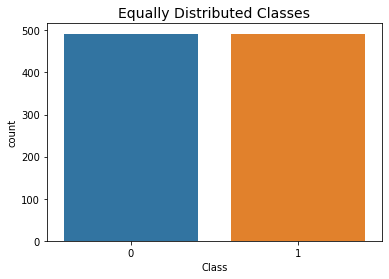

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

Finding correlation of the Imbalanced entire dataset and the Balanced subset of the dataset (under consideration)

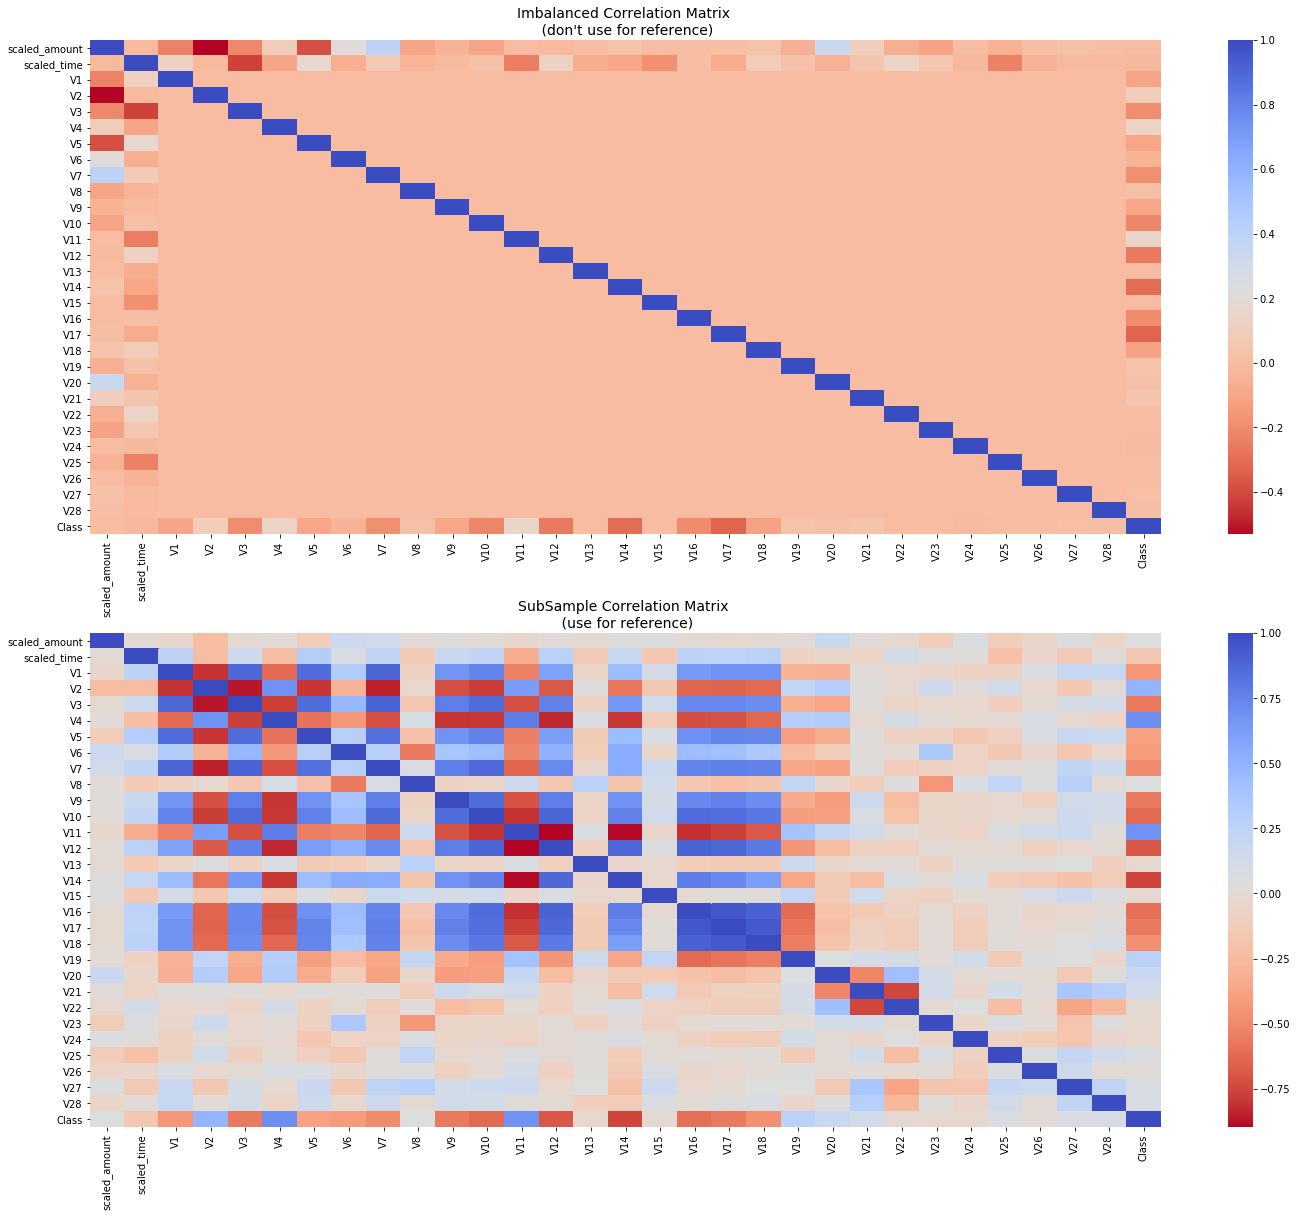

In [15]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# The subset DataFrame
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### Negative Correlations with our Target Variable (Class) 
(The lower our feature value the more likely it will be a fraud transaction)

Drawing boxplots for better understanding

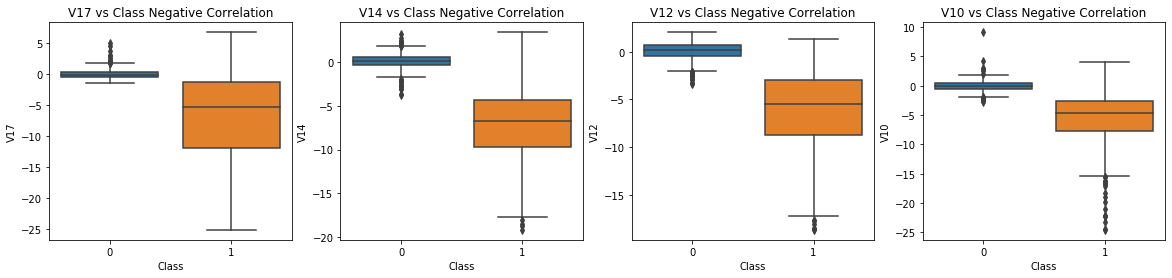

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


#### Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
Drawing boxplots for better understanding

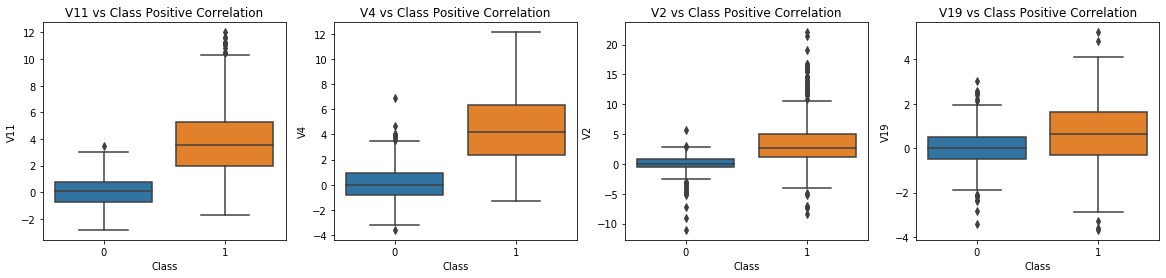

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()


#### Since we know the features that positively and negatively correlate to our target variable, it is essential that we tranform our negatively corrrelated features.




Visualizing boxplots for the features 'V14', 'V12', and 'V10'

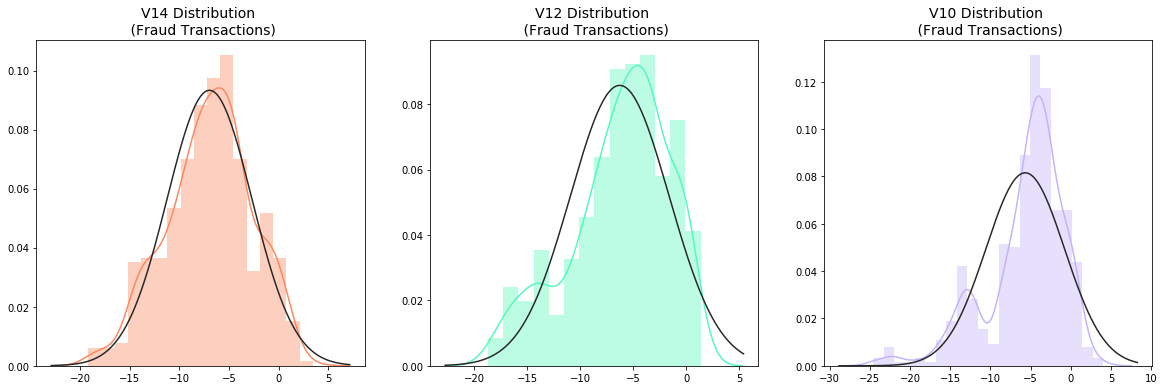

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

#### V14 Removing Outliers (Highest Negative Correlated with Labels)

In [19]:

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### V12 removing outliers from fraud transactions

In [20]:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.047596570821604, -18.553697009645802, -18.4311310279993, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976


#### Removing outliers for V10 Feature

In [21]:

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-22.1870885620007, -20.949191554361104, -15.563791338730098, -23.2282548357516, -15.346098846877501, -16.2556117491401, -15.2399619587112, -16.6011969664137, -24.403184969972802, -18.9132433348732, -24.5882624372475, -22.1870885620007, -16.3035376590131, -14.9246547735487, -14.9246547735487, -15.2399619587112, -22.1870885620007, -16.6496281595399, -22.1870885620007, -15.563791338730098, -19.836148851696, -15.1237521803455, -15.2318333653018, -17.141513641289198, -16.7460441053944, -15.124162814494698, -18.2711681738888]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 948


#### The final visual display for the outliers removed from our negatively correlated features

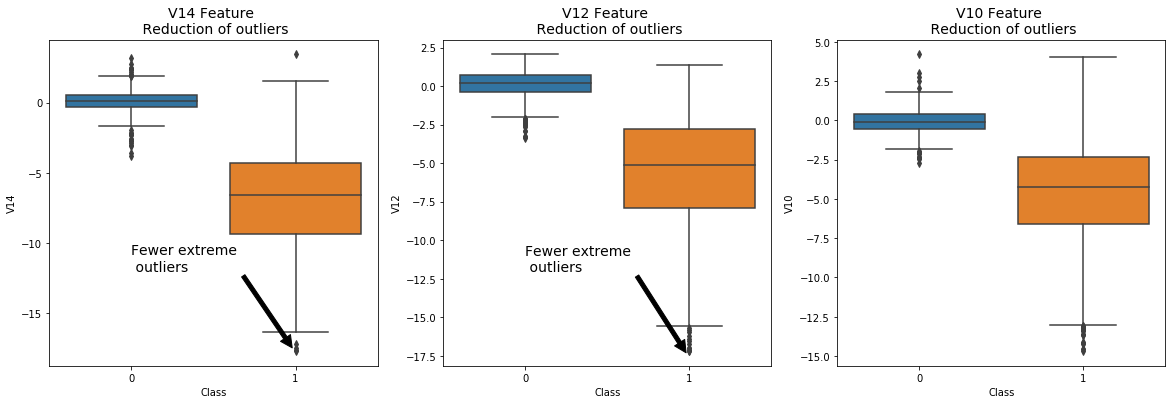

In [22]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed

# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -17.1), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

#### Comparing the implementation time for forming clusters with respect to our Target Variable
T-SNE, PCA, and Truncated SVD

Scaling the variables so as to produce a perfect clusters

In [23]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 9.5 s
PCA took 0.034 s
Truncated SVD took 0.0035 s


#### Cluster Representation between T-SNE, PCA, and Truncated SVD

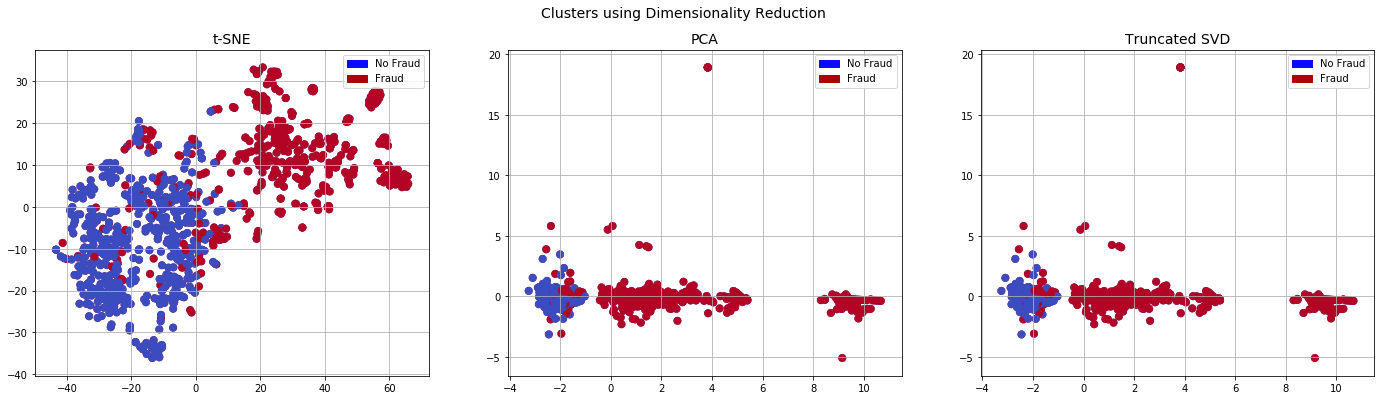

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#### Using K-Means Clustering and Spectral Clustering
Blue dots are the points representing No Fraud

Red dots are the points representing Fraud

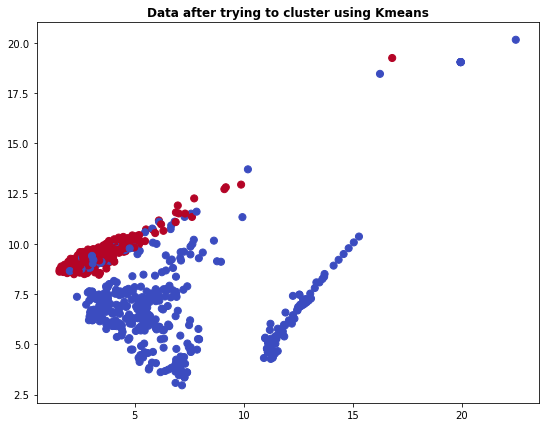

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42).fit_transform(X_scaled)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data after trying to cluster using Kmeans', fontsize=12, fontweight='demi')

ax.scatter(kmeans[:, 0], kmeans[:, 1],c=(y == 0),label='No Fraud', s=50, cmap='coolwarm')

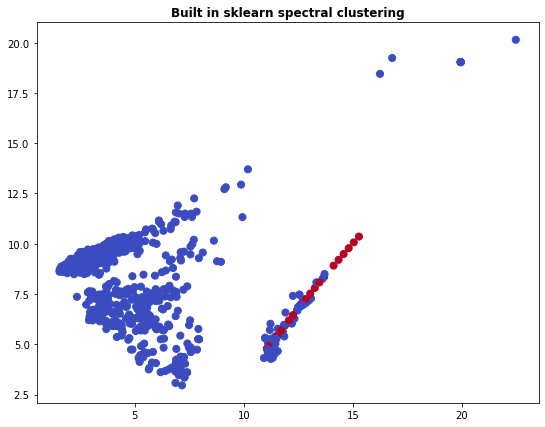

In [26]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')

labelsS = model.fit_predict(X_scaled)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Built in sklearn spectral clustering', fontsize=12, fontweight='demi')
plt.scatter(kmeans[:, 0], kmeans[:, 1], c=labelsS, s=50, cmap='coolwarm')

## Model Building

### Arranging Data into Features Matrix and Target Vector

In [27]:
features_names = new_df.drop("Class", axis =1)
features_names

scaled_amount  scaled_time         V1        V2         V3        V4  \
81705       -0.167680    -0.301178   1.287886 -0.498802   0.517103 -0.692498   
42784        0.328233    -0.510450 -10.940739  6.261586 -14.182339  7.183602   
283906       0.111647     1.025482   1.968568 -0.204544  -2.692930  0.147323   
20198        1.157130    -0.632526  -2.830984  0.885657   1.199930  2.861292   
30398       -0.179837    -0.573151  -3.519030  4.140867  -3.628202  5.505672   
...               ...          ...        ...       ...        ...       ...   
157868      -0.296793     0.303751  -1.532810  2.232752  -5.923100  3.386708   
133972       1.153776    -0.048156  -0.175920  0.632825   0.728816  1.693627   
141257      -0.307413    -0.005733  -0.937843  3.462889  -6.445104  4.932199   
138543       7.210228    -0.023273  -1.351558 -1.311779   1.546618 -1.409844   
223578      -0.183050     0.690163  -5.256434  0.364541  -5.412085  2.400031   

              V5        V6         V7        V8  ...       V19       V20  \
81705  -0.910900 -0.352180  -0.571457 -0.005780  ... -0.912352 -0.448210   
42784  -9.951363 -3.860820 -13.547302  7.096472  ...  3.656787 -0.088342   
283906  2.617434  3.392685  -0.314057  0.751152  ... -0.747468 -0.139973   
20198   0.321669  0.289966   1.767760 -2.451050  ...  0.484759 -1.016923   
30398  -4.057463 -0.905945  -6.652031  2.634524  ...  2.463843  0.898723   
...          ...       ...        ...       ...  ...       ...       ...   
157868 -0.153443 -1.419748  -3.878576  1.444656  ...  3.527738  0.520840   
133972 -0.395429  0.598776  -0.833595 -2.594713  ...  0.322335  0.793936   
141257 -2.233983 -2.291561  -5.695594  1.338825  ...  1.007667  1.129532   
138543 -2.259591  0.150014   1.681573 -0.214306  ... -0.449293  1.310173   
223578  0.697301 -1.998755  -5.835532 -0.887739  ...  0.606571 -0.403685   

             V21       V22       V23       V24       V25       V26       V27  \
81705  -0.350380 -0.500699  0.144829  0.259781  0.037021  0.946270 -0.037819   
42784   2.267448 -0.492029 -0.239303  0.454368 -0.101611  0.446997  0.062293   
283906  0.270513  0.739078  0.009684  0.710161  0.346396 -0.408395  0.016818   
20198   0.546589  0.334971  0.172106  0.623590 -0.527114 -0.079215 -2.532445   
30398   1.582556  0.778710 -0.135707 -0.004278  0.032706  0.362014  0.900925   
...          ...       ...       ...       ...       ...       ...       ...   
157868  0.632505 -0.070838 -0.490291 -0.359983  0.050678  1.095671  0.471741   
133972 -1.287243  0.315397 -0.146296  0.091945  0.763177 -0.154869  0.121860   
141257  1.066550 -0.521657 -0.319917 -0.405859  0.906802  1.165784  1.374495   
138543  0.791922  1.269789  0.938607  0.395194  0.324879 -0.221457 -0.075571   
223578 -0.648259  0.511285 -1.110045  0.178987  0.220235 -0.699809  0.580487   

             V28  
81705   0.000413  
42784  -0.439770  
283906 -0.053690  
20198   0.311177  
30398   0.554897  
...          ...  
157868 -0.106667  
133972  0.263133  
141257  0.729889  
138543  0.150819  
223578 -0.173630  

[948 rows x 30 columns]

In [28]:
features_names.describe()

scaled_amount  scaled_time          V1          V2          V3  \
count     948.000000   948.000000  948.000000  948.000000  948.000000   
mean        1.237800     0.047816   -1.905957    1.464606   -2.966657   
std         3.594679     0.569626    4.761995    3.163423    5.389110   
min        -0.307413    -0.994572  -30.552380  -11.052809  -31.103685   
25%        -0.282401    -0.454478   -2.435312   -0.187507   -4.512043   
50%        -0.051142    -0.037383   -0.733193    0.885338   -1.257318   
75%         1.089779     0.592852    1.079751    2.467495    0.308970   
max        48.048068     1.027914    2.286920   16.713389    2.963260   

               V4          V5          V6          V7          V8  ...  \
count  948.000000  948.000000  948.000000  948.000000  948.000000  ...   
mean     2.085615   -1.163645   -0.624775   -2.081941    0.463011  ...   
std      2.943484    3.686071    1.693029    4.498266    4.237780  ...   
min     -3.577402  -22.105532   -6.406267  -21.922811  -37.353443  ...   
25%     -0.153129   -1.516167   -1.440122   -2.612714   -0.183525  ...   
50%      1.343416   -0.299576   -0.615351   -0.485746    0.173740  ...   
75%      3.872083    0.616305    0.137275    0.322585    0.842034  ...   
max     11.927512   11.095089    7.478806    8.943941   20.007208  ...   

              V19         V20         V21         V22         V23         V24  \
count  948.000000  948.000000  948.000000  948.000000  948.000000  948.000000   
mean     0.305065    0.094282    0.498509   -0.052136   -0.041279   -0.105276   
std      1.271444    0.869692    2.392490    1.040507    1.137617    0.592708   
min     -3.681904   -4.149340   -6.389132   -8.887017  -19.254328   -2.727935   
25%     -0.458130   -0.213556   -0.149436   -0.548002   -0.229920   -0.442291   
50%      0.231825    0.006263    0.160664    0.018672   -0.035194   -0.045794   
75%      0.937428    0.354286    0.634681    0.539386    0.187394    0.322054   
max      5.228342    6.601506   27.202839    2.941475    5.303607    1.245092   

              V25         V26         V27         V28  
count  948.000000  948.000000  948.000000  948.000000  
mean    -0.000944    0.048045    0.177163    0.049026  
std      0.669667    0.478926    0.711187    0.415141  
min     -4.781606   -1.159713   -3.908080   -3.396822  
25%     -0.326342   -0.274456   -0.062347   -0.055217  
50%      0.016221   -0.001175    0.058259    0.041859  
75%      0.373239    0.323804    0.455031    0.219773  
max      2.208209    2.745261    3.052358    2.040377  

[8 rows x 30 columns]

In [29]:
# Convert to numpy array
X = features_names.values

In [30]:
X.shape

(948, 30)

In [31]:
y = new_df.loc[:,'Class'].values

In [32]:
y.shape

(948,)

### Using the Train Test Split 

A goal of supervised learning is to build a model that performs well on new data. If you have new data, you could see how your model performs on it. The problem is that you may not have new data, but you can simulate this experience with a procedure like train test split.

1) Split the dataset into two pieces: a training set and a testing set. Typically, about 75% of the data goes to your training set and 25% goes to your test set.

2) Train the model on the training set.

3) Test the model on the testing set and evaluate the performance

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Logistic Regression

Build a model for Logistic Regression and Predicting the score

In [34]:
clf_log_reg= LogisticRegression(random_state=2)

In [35]:
clf_log_reg.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [36]:
clf_log_reg.predict(X_train[0:10])

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [37]:
y_pred_log_reg= clf_log_reg.predict(X_test)

In [38]:
clf_log_reg.score(X_test, y_test)

0.9493670886075949

Finding out the Accuracy score

In [39]:
training_score = cross_val_score(clf_log_reg, X_train, y_train, cv=5)
print("Logistic Regression has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Logistic Regression has a training score of 94.0 % accuracy score


Building a Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix")
print(confusion_matrix)

Logistic Regression Confusion Matrix
[[128   2]
 [ 10  97]]


### Random Forest Classifier

Build a model for Random Forest Classifier and Predicting the score

In [41]:
clf_rf= RandomForestClassifier(max_depth=2, random_state=2)

In [42]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=2)

In [43]:
clf_rf.predict(X_train[0:10])

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [44]:
y_pred_rf= clf_rf.predict(X_test)

In [45]:
clf_rf.score(X_test, y_test)

0.919831223628692

Finding out the Accuracy score

In [46]:
training_score = cross_val_score(clf_rf, X_train, y_train, cv=5)
print("Random Forest has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Random Forest has a training score of 92.0 % accuracy score


Building a Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix")
print(confusion_matrix)

Random Forest Confusion Matrix
[[129   1]
 [ 18  89]]


### Support Vector Classifier

Build a model for Support Vector Machine Classifier and Predicting the score

In [48]:
clf_svm= make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))

In [49]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [50]:
clf_svm.predict(X_train[0:10])

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [51]:
y_pred_svm= clf_svm.predict(X_test)

In [52]:
# R square error
clf_svm.score(X_test, y_test)

0.9367088607594937

Finding out the Accuracy score

In [53]:
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(clf_svm, X_train, y_train, cv=5)
print("Support Vector Classifiers has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Support Vector Classifiers has a training score of 93.0 % accuracy score


Building a Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred_svm)
print("Support Vector Classification Confusion Matrix")
print(confusion_matrix)

Support Vector Classification Confusion Matrix
[[128   2]
 [ 13  94]]


### Decision Tree Classifier

Build a model for Decision Tree Classifier and Predicting the score

In [55]:
clf_dt= DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [56]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [57]:
clf_dt.predict(X_train[0:10])

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [58]:
y_pred_dt= clf_dt.predict(X_test)

In [59]:
clf_dt.score(X_test, y_test)

0.9409282700421941

Finding out the Accuracy score

In [60]:
training_score = cross_val_score(clf_dt, X_train, y_train, cv=5)
print("Decision Tree Classifiers has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Decision Tree Classifiers has a training score of 92.0 % accuracy score


#### Visualizing the Decision Tree

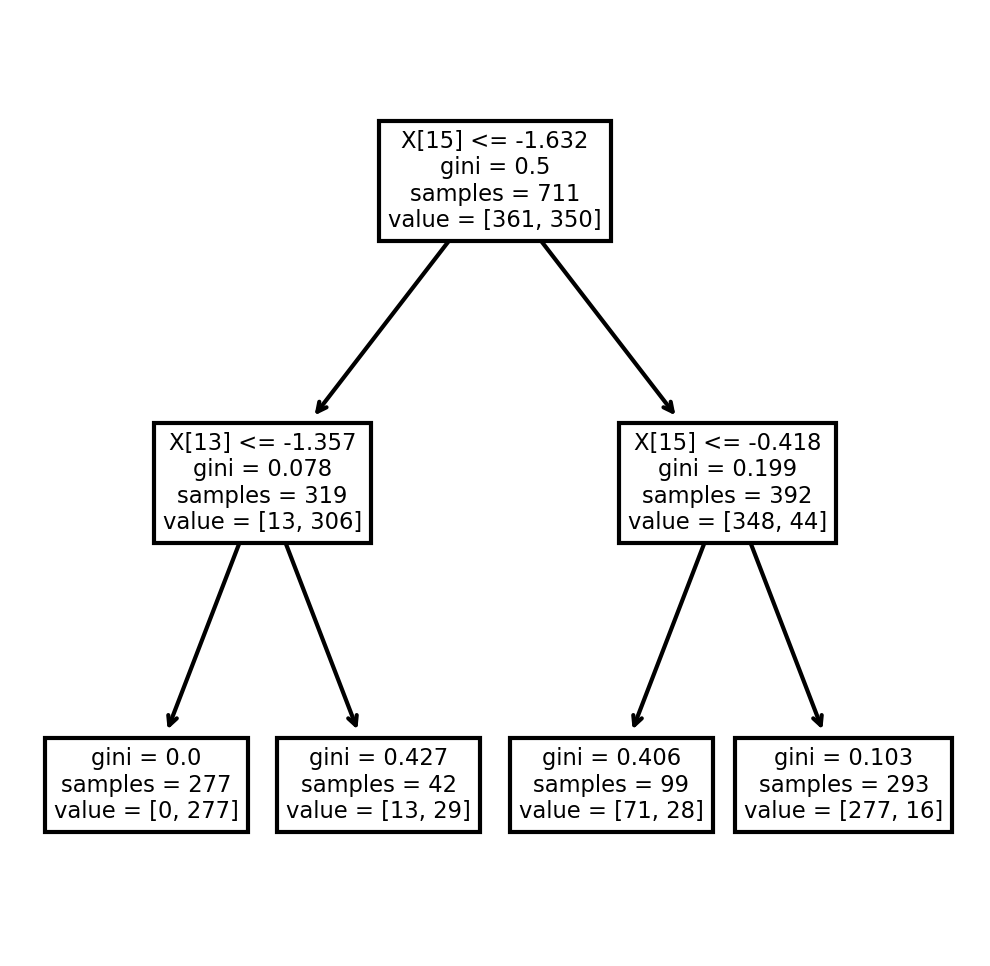

In [61]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf_dt);
fig.savefig('plottreedefault.png')

In [62]:
# Putting the feature names and class names into variables
fn = ['scaled_amount','scaled_time','V1','V2','V3',
     'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13',
     'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
     'V23', 'V24', 'V25', 'V26', 'V27','V28']
cn = ['Non-Fraud', 'Fraud']

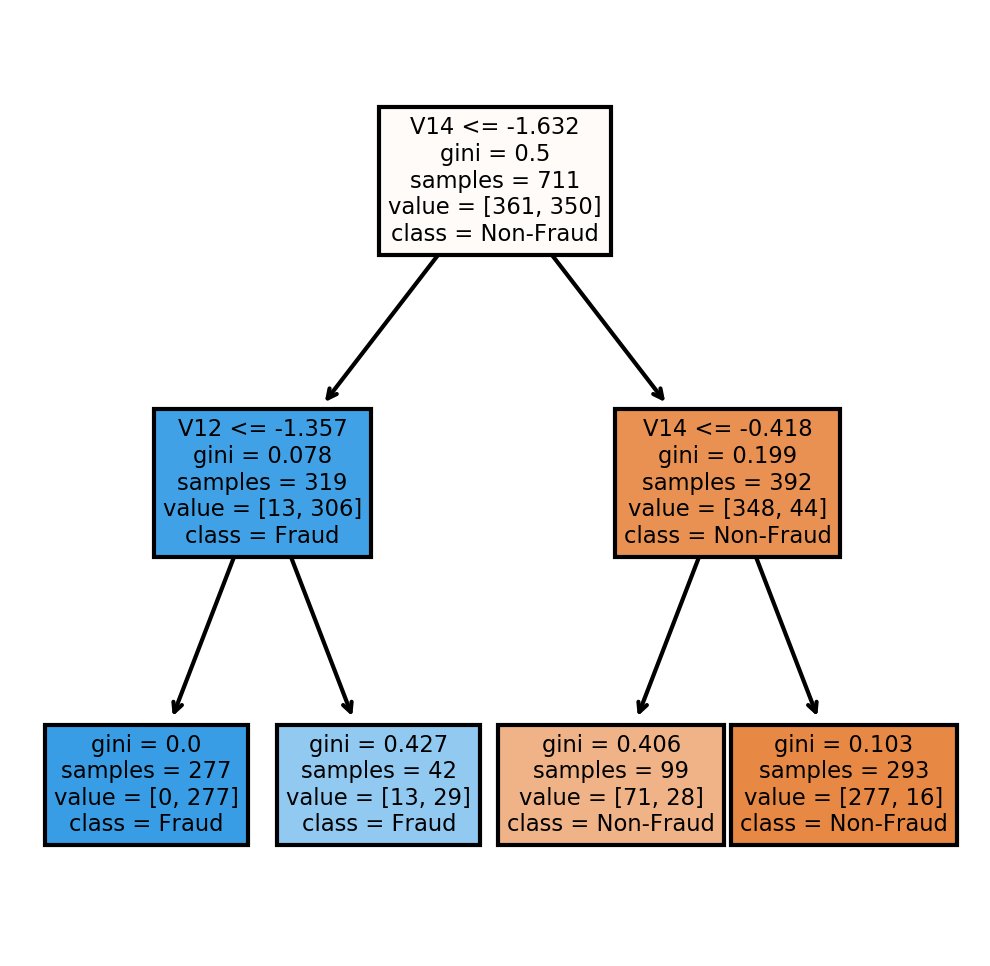

In [63]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf_dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')

Building a Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix")
print(confusion_matrix)

Decision Tree Confusion Matrix
[[129   1]
 [ 13  94]]


### Summarizing the ROC curve for all the Models

The receiver operating characteristic (ROC) curve is a two dimensional graph in which the false positive rate is plotted on the X axis and the true positive rate is plotted on the Y axis. The ROC curves are useful to visualize and compare the performance of classifier methods.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly.

From the below ROC plots and the AUC, we can conclude that the best model is 
### Support Vector

roc_auc_score for DecisionTree:  0.9417685118619699
roc_auc_score for Support Vector:  0.9800143781452193
roc_auc_score for Logistic Regression:  0.9741193386053199
roc_auc_score for Random Forest:  0.9835370237239396


Text(0, 0.5, 'False Positive Rate')

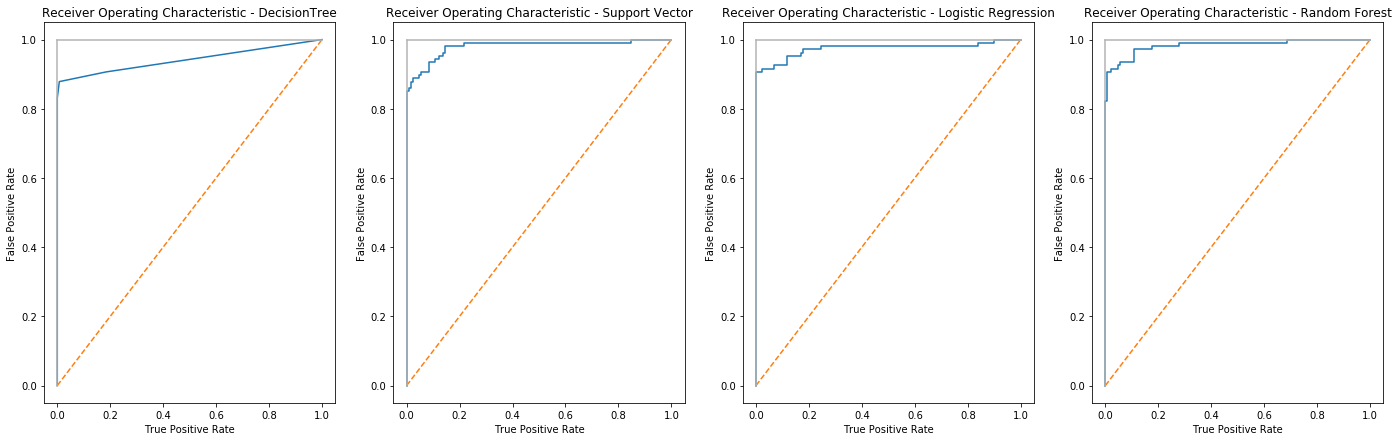

In [65]:
# Getting predicted probabilities
y_score1 = clf_dt.predict_proba(X_test)[:,1]
y_score2 = clf_svm.predict_proba(X_test)[:,1]
y_score3 = clf_log_reg.predict_proba(X_test)[:,1]
y_score4 = clf_rf.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Support Vector: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score4))

# Ploting ROC curves
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 7))
#plt.subplot(1,2,1)
axes[0].set_title('Receiver Operating Characteristic - DecisionTree')
axes[1].set_title('Receiver Operating Characteristic - Support Vector')
axes[2].set_title('Receiver Operating Characteristic - Logistic Regression')
axes[3].set_title('Receiver Operating Characteristic - Random Forest')


axes[0].plot(false_positive_rate1, true_positive_rate1)
axes[1].plot(false_positive_rate2, true_positive_rate2)
axes[2].plot(false_positive_rate3, true_positive_rate3)
axes[3].plot(false_positive_rate4, true_positive_rate4)


axes[0].plot([0, 1], ls="--")
axes[1].plot([0, 1], ls="--")
axes[2].plot([0, 1], ls="--")
axes[3].plot([0, 1], ls="--")


axes[0].plot([0, 0], [1, 0] , c=".7"), axes[0].plot([1, 1] , c=".7")
axes[1].plot([0, 0], [1, 0] , c=".7"), axes[1].plot([1, 1] , c=".7")
axes[2].plot([0, 0], [1, 0] , c=".7"), axes[2].plot([1, 1] , c=".7")
axes[3].plot([0, 0], [1, 0] , c=".7"), axes[3].plot([1, 1] , c=".7")


axes[0].set_xlabel('True Positive Rate')
axes[0].set_ylabel('False Positive Rate')

axes[1].set_xlabel('True Positive Rate')
axes[1].set_ylabel('False Positive Rate')

axes[2].set_xlabel('True Positive Rate')
axes[2].set_ylabel('False Positive Rate')

axes[3].set_xlabel('True Positive Rate')
axes[3].set_ylabel('False Positive Rate')



### Recurvise Feature Elimination

In [66]:
X = new_df.loc[:, new_df.columns != 'Class']
y = new_df.loc[:, new_df.columns == 'Class']

In [67]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\vidhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error



[False  True  True False False  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True False
 False  True False  True False  True]
[ 2  1  1  8  5  1  1  1  9  1  1  1  1  1  1  1  4  1  1  1  1 11  1  3
  7  1  6  1 10  1]


### Building a Logit Model

Initially passings all the parameters in the model and then reducing parameters one by one based on the significance (P-value <0.05)

In [69]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result= logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.121246
         Iterations 20
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.825      
Dependent Variable: Class            AIC:              289.8830   
Date:               2020-12-02 13:55 BIC:              435.5136   
No. Observations:   948              Log-Likelihood:   -114.94    
Df Model:           29               LL-Null:          -656.49    
Df Residuals:       918              LLR p-value:      2.2829e-209
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     20.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------
scaled_amount    3.8736   1.3094  2.9583 0.0031    1.3073   6.4400
scaled_time     -1.7123   0.5962 -2.8722 0.0041   -2

From the above model we can see that 'V26' has the maximum P-value that makes the entire model insignificant.
Therefore, its mandatory to remove the variable in order for the model to be significant

In [70]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V13','V14','V15','V16','V17', 'V18', 'V19', 'V20',
     'V21', 'V22','V23', 'V24','V25','V27','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.097947
         Iterations 21
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.859      
Dependent Variable:  Class            AIC:              195.5175   
Date:                2020-12-02 13:55 BIC:              327.5816   
No. Observations:    702              Log-Likelihood:   -68.759    
Df Model:            28               LL-Null:          -486.59    
Df Residuals:        673              LLR p-value:      6.7749e-158
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      21.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
scaled_amount    4.7728   1.5429  3.0934 0.0020    1.7488    7.7968
scaled_time     -2.3498   0.8442 -2.7834

The same process of removing the variables from the model has been implemented in the next few steps

In [71]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15', 'V16', 'V17', 'V18', 'V19', 'V20',
     'V21', 'V22','V23', 'V24','V25','V27','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.098034
         Iterations 21
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.859      
Dependent Variable:  Class            AIC:              193.6401   
Date:                2020-12-02 13:55 BIC:              321.1502   
No. Observations:    702              Log-Likelihood:   -68.820    
Df Model:            27               LL-Null:          -486.59    
Df Residuals:        674              LLR p-value:      1.2789e-158
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      21.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
-------------------------------------------------------------------
scaled_amount    4.6484   1.4905  3.1187 0.0018    1.7270    7.5697
scaled_time     -2.3736   0.8469 -2.8028

In [72]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15','V16', 'V17', 'V18', 'V19', 'V20',
     'V21', 'V22','V23','V24', 'V25','V26','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.157951
         Iterations 18
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.772      
Dependent Variable: Class            AIC:              277.7628   
Date:               2020-12-02 13:55 BIC:              405.2729   
No. Observations:   702              Log-Likelihood:   -110.88    
Df Model:           27               LL-Null:          -486.59    
Df Residuals:       674              LLR p-value:      6.2990e-141
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     18.0000                                       
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
scaled_amount     0.4233   0.2337  1.8111 0.0701  -0.0348   0.8814
scaled_time      -2.2800   0.5349 -4.2623 0.0000  -3

In [73]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15','V17', 'V18', 'V19', 'V20',
     'V21', 'V22','V23','V24','V25','V26','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.260599
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.624      
Dependent Variable: Class            AIC:              419.8803   
Date:               2020-12-02 13:55 BIC:              542.8365   
No. Observations:   702              Log-Likelihood:   -182.94    
Df Model:           26               LL-Null:          -486.59    
Df Residuals:       675              LLR p-value:      1.7882e-111
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.4268    0.1756  -8.1264  0.0000  -1.7710  -1.0827
scaled_time    -1.2425    0.3578  -3.4725  0.000

In [74]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15','V18', 'V19', 'V20','V21', 'V22','V23','V24', 'V25','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.270870
         Iterations 11
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.609      
Dependent Variable: Class            AIC:              430.3020   
Date:               2020-12-02 13:55 BIC:              544.1503   
No. Observations:   702              Log-Likelihood:   -190.15    
Df Model:           24               LL-Null:          -486.59    
Df Residuals:       677              LLR p-value:      7.3276e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     11.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.3505    0.1630  -8.2870  0.0000  -1.6699  -1.0311
scaled_time    -1.0270    0.3411  -3.0107  0.002

In [75]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15','V17', 'V18', 'V19', 'V20','V21','V23','V24', 'V25','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.271044
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.609      
Dependent Variable: Class            AIC:              430.5457   
Date:               2020-12-02 13:55 BIC:              544.3940   
No. Observations:   702              Log-Likelihood:   -190.27    
Df Model:           24               LL-Null:          -486.59    
Df Residuals:       677              LLR p-value:      8.2398e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.3100    0.1629  -8.0419  0.0000  -1.6292  -0.9907
scaled_time    -1.3076    0.3481  -3.7566  0.000

In [76]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
     'V11','V12','V14','V15','V17', 'V18', 'V19', 'V20','V21','V23', 'V25','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.275283
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.603      
Dependent Variable: Class            AIC:              434.4967   
Date:               2020-12-02 13:55 BIC:              543.7911   
No. Observations:   702              Log-Likelihood:   -193.25    
Df Model:           23               LL-Null:          -486.59    
Df Residuals:       678              LLR p-value:      2.8267e-109
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.3099    0.1623  -8.0716  0.0000  -1.6279  -0.9918
scaled_time    -1.1532    0.3360  -3.4324  0.000

In [77]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V10',
     'V11','V12','V14','V15','V17', 'V18', 'V19', 'V20','V21','V23', 'V25','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.275410
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.603      
Dependent Variable: Class            AIC:              432.6761   
Date:               2020-12-02 13:55 BIC:              537.4166   
No. Observations:   702              Log-Likelihood:   -193.34    
Df Model:           22               LL-Null:          -486.59    
Df Residuals:       679              LLR p-value:      5.8918e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.3168    0.1613  -8.1622  0.0000  -1.6330  -1.0006
scaled_time    -1.1462    0.3352  -3.4190  0.000

In [78]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V10','V12','V14','V15','V17', 'V18', 'V19', 'V20','V21','V23', 'V25','V28'] 
X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.278423
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.598      
Dependent Variable: Class            AIC:              434.9056   
Date:               2020-12-02 13:55 BIC:              535.0921   
No. Observations:   702              Log-Likelihood:   -195.45    
Df Model:           21               LL-Null:          -486.59    
Df Residuals:       680              LLR p-value:      8.5104e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.2486    0.1541  -8.1016  0.0000  -1.5507  -0.9466
scaled_time    -1.2792    0.3271  -3.9112  0.000

In [79]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V10','V12','V14','V17', 'V18', 'V19', 'V20','V21','V23', 'V25','V28'] 

X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.279658
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.597      
Dependent Variable: Class            AIC:              434.6400   
Date:               2020-12-02 13:55 BIC:              530.2726   
No. Observations:   702              Log-Likelihood:   -196.32    
Df Model:           20               LL-Null:          -486.59    
Df Residuals:       681              LLR p-value:      3.6034e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.2352    0.1523  -8.1108  0.0000  -1.5336  -0.9367
scaled_time    -1.3692    0.3222  -4.2503  0.000

By Power of Elimination (POE) we can see that the below model consists of all the features that are significant with respect to the target

In [80]:
cols=['scaled_amount','scaled_time','V1','V2','V3','V4','V5','V6','V7','V8','V10','V12','V14','V17', 'V18', 'V20','V21','V23', 'V25','V28'] 

X=os_data_X[cols]
y=os_data_y['Class']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.280859
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.595      
Dependent Variable: Class            AIC:              434.3264   
Date:               2020-12-02 13:55 BIC:              525.4050   
No. Observations:   702              Log-Likelihood:   -197.16    
Df Model:           19               LL-Null:          -486.59    
Df Residuals:       682              LLR p-value:      1.4561e-110
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
scaled_amount  -1.2067    0.1504  -8.0219  0.0000  -1.5015  -0.9119
scaled_time    -1.3846    0.3189  -4.3412  0.000

# End